# **CSST 106**

**Verdad, Jane Benneth Dione**

**BSCS-4B**

**October 2024**

**Exercise 4**

# **Object Detection and Recognition**

# Task 1: HOG (Histogram of Oriented Gradients) Object Detection

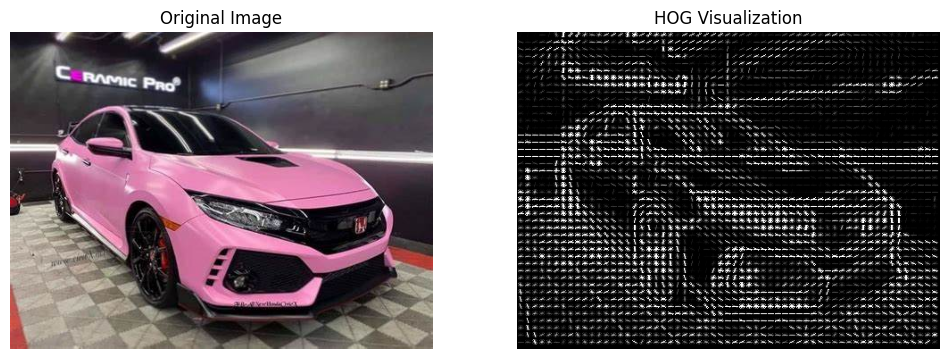

In [44]:
import cv2
import matplotlib.pyplot as plt
from skimage.feature import hog
from skimage import exposure

# Load the image
image_path = 'car.jpeg'
image = cv2.imread(image_path)

# Convert the image to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply the HOG descriptor to extract features
hog_features, hog_image = hog(gray_image,
                              orientations=9,
                              pixels_per_cell=(8, 8),
                              cells_per_block=(2, 2),
                              block_norm='L2-Hys',
                              visualize=True,
                              channel_axis=None)

# Display the original image and HOG image (visualized gradient orientations)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6), sharex=True, sharey=True)

ax1.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
ax1.set_title('Original Image')
ax1.axis('off')

hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))
ax2.imshow(hog_image_rescaled, cmap='gray')
ax2.set_title('HOG Visualization')
ax2.axis('off')

plt.show()


# Task 2: YOLO (You Only Look Once) Object Detection

In [20]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 879.0/879.0 kB 14.1 MB/s eta 0:00:00



0: 512x640 1 car, 227.7ms
Speed: 5.6ms preprocess, 227.7ms inference, 2.3ms postprocess per image at shape (1, 3, 512, 640)


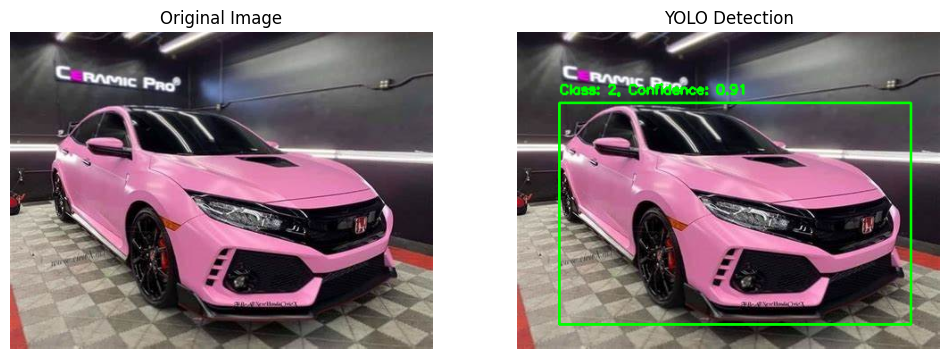

In [46]:
import cv2
import numpy as np
from ultralytics import YOLO  # Import the YOLO class from the ultralytics package
import matplotlib.pyplot as plt

# Load the pre-trained YOLO model
model = YOLO('yolov8n.pt')  # Use a pre-trained YOLOv8 model

# Load an image
image_path = 'car.jpeg'
original_image = cv2.imread(image_path)

# Check if the image was loaded successfully
if original_image is None:
    raise FileNotFoundError("Image not found. Please check the image path.")

# Make a copy for YOLO detection
yolo_image = original_image.copy()

# Perform inference
results = model(yolo_image)

# Process results
for result in results:
    boxes = result.boxes  # Get the boxes from the detection results
    for box in boxes:
        x1, y1, x2, y2 = box.xyxy[0].numpy()  # Get the bounding box coordinates
        conf = box.conf[0].item()  # Get the confidence score
        class_id = int(box.cls[0].item())  # Get the class ID

        if conf > 0.5:  # Filter out low confidence detections
            label = f"Class: {class_id}, Confidence: {conf:.2f}"
            # Draw bounding box and label
            cv2.rectangle(yolo_image, (int(x1), int(y1)), (int(x2), int(y2)), (0, 255, 0), 2)
            cv2.putText(yolo_image, label, (int(x1), int(y1) - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

# Display the original and YOLO-detected images
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

ax1.imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB))
ax1.set_title('Original Image')
ax1.axis('off')

ax2.imshow(cv2.cvtColor(yolo_image, cv2.COLOR_BGR2RGB))
ax2.set_title('YOLO Detection')
ax2.axis('off')

plt.show()


# Task 3: SSD (Single Shot MultiBox Detector) with TensorFlow

In [23]:
pip install tensorflow opencv-python matplotlib


In [25]:
# Download and extract the model in Google Colab
!wget http://download.tensorflow.org/models/object_detection/ssd_mobilenet_v2_coco_2018_03_29.tar.gz -O ssd_mobilenet_v2_coco.tar.gz
!mkdir -p /content/ssd_mobilenet_v2
!tar -xvf ssd_mobilenet_v2_coco.tar.gz -C /content/ssd_mobilenet_v2

# Set the model path for loading
model_path = '/content/ssd_mobilenet_v2/ssd_mobilenet_v2_coco_2018_03_29/saved_model'


--2024-11-05 02:28:28--  http://download.tensorflow.org/models/object_detection/ssd_mobilenet_v2_coco_2018_03_29.tar.gz
Resolving download.tensorflow.org (download.tensorflow.org)... 74.125.196.207, 74.125.141.207, 74.125.139.207, ...
Connecting to download.tensorflow.org (download.tensorflow.org)|74.125.196.207|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 187925923 (179M) [application/x-tar]
Saving to: ‘ssd_mobilenet_v2_coco.tar.gz’

ssd_mobilenet_v2_co 100%[===================>] 179.22M   182MB/s    in 1.0s    

2024-11-05 02:28:29 (182 MB/s) - ‘ssd_mobilenet_v2_coco.tar.gz’ saved [187925923/187925923]

ssd_mobilenet_v2_coco_2018_03_29/checkpoint
ssd_mobilenet_v2_coco_2018_03_29/model.ckpt.meta
ssd_mobilenet_v2_coco_2018_03_29/pipeline.config
ssd_mobilenet_v2_coco_2018_03_29/saved_model/saved_model.pb
ssd_mobilenet_v2_coco_2018_03_29/frozen_inference_graph.pb
ssd_mobilenet_v2_coco_2018_03_29/saved_model/
ssd_mobilenet_v2_coco_2018_03_29/saved_model/variabl

Available signatures: KeysView(_SignatureMap({'serving_default': <ConcreteFunction () -> Dict[['detection_classes', TensorSpec(shape=(None, 100), dtype=tf.float32, name=None)], ['num_detections', TensorSpec(shape=(None,), dtype=tf.float32, name=None)], ['detection_boxes', TensorSpec(shape=(None, 100, 4), dtype=tf.float32, name=None)], ['detection_scores', TensorSpec(shape=(None, 100), dtype=tf.float32, name=None)]] at 0x7C49AB67B310>}))


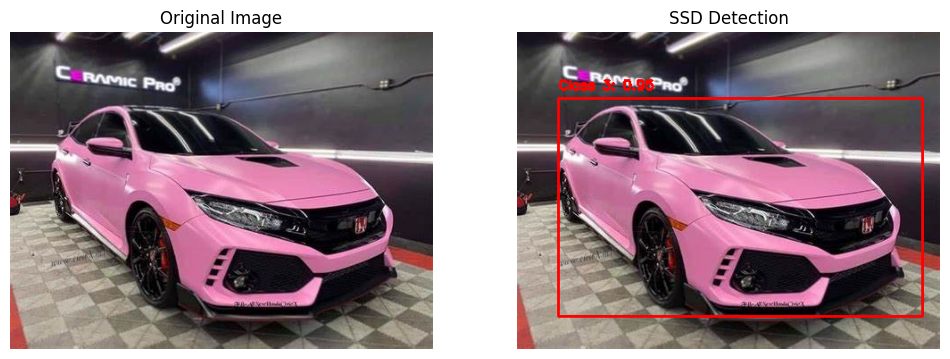

In [47]:
import tensorflow as tf
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the pre-trained SSD MobileNet V2 model
model_path = '/content/ssd_mobilenet_v2/ssd_mobilenet_v2_coco_2018_03_29/saved_model'
model = tf.saved_model.load(model_path)

# Check available signatures to confirm correct loading of the model
print("Available signatures:", model.signatures.keys())

# Use the 'serving_default' signature for inference
infer = model.signatures['serving_default']

# Load and preprocess the image
image_path = 'car.jpeg'
image = cv2.imread(image_path)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Resize the image to 300x300 (required by SSD MobileNet V2) without normalizing
input_image = tf.image.resize(image_rgb, (300, 300))
input_image = tf.cast(input_image, dtype=tf.uint8)  # Ensure the image is in uint8 format
input_image = tf.expand_dims(input_image, axis=0)   # Add batch dimension

# Run inference using the serving signature
detections = infer(input_image)

# Extract detection data from the results
boxes = detections['detection_boxes'][0].numpy()
scores = detections['detection_scores'][0].numpy()
classes = detections['detection_classes'][0].numpy().astype(int)
num_detections = int(detections['num_detections'][0])

# Set a confidence threshold for displaying detections
confidence_threshold = 0.5

# Copy the original image for drawing bounding boxes
detected_image = image_rgb.copy()
height, width, _ = detected_image.shape

# Draw bounding boxes for detections above the confidence threshold
for i in range(num_detections):
    if scores[i] >= confidence_threshold:
        ymin, xmin, ymax, xmax = boxes[i]
        xmin, xmax = int(xmin * width), int(xmax * width)
        ymin, ymax = int(ymin * height), int(ymax * height)

        # Draw bounding box around the detected object
        cv2.rectangle(detected_image, (xmin, ymin), (xmax, ymax), (255, 0, 0), 2)

        # Display class label and confidence score
        label = f"Class {classes[i]}: {scores[i]:.2f}"
        cv2.putText(detected_image, label, (xmin, ymin - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 2)

# Display the original and SSD detected images
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(image_rgb)
plt.axis('off')
plt.title("Original Image")

plt.subplot(1, 2, 2)
plt.imshow(detected_image)
plt.axis('off')
plt.title("SSD Detection")

plt.show()

In [ ]:
!wget http://download.tensorflow.org/models/object_detection/ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz
!tar -xvf ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz


--2024-11-04 17:30:33--  http://download.tensorflow.org/models/object_detection/ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz
Resolving download.tensorflow.org (download.tensorflow.org)... 173.194.203.207, 74.125.199.207, 74.125.142.207, ...
Connecting to download.tensorflow.org (download.tensorflow.org)|173.194.203.207|:80... connected.
HTTP request sent, awaiting response... 403 Forbidden
2024-11-04 17:30:33 ERROR 403: Forbidden.

tar: ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz: Cannot open: No such file or directory
tar: Error is not recoverable: exiting now


# Task 4: Traditional vs. Deep Learning Object Detection Comparison


0: 512x640 1 car, 208.2ms
Speed: 3.8ms preprocess, 208.2ms inference, 1.5ms postprocess per image at shape (1, 3, 512, 640)


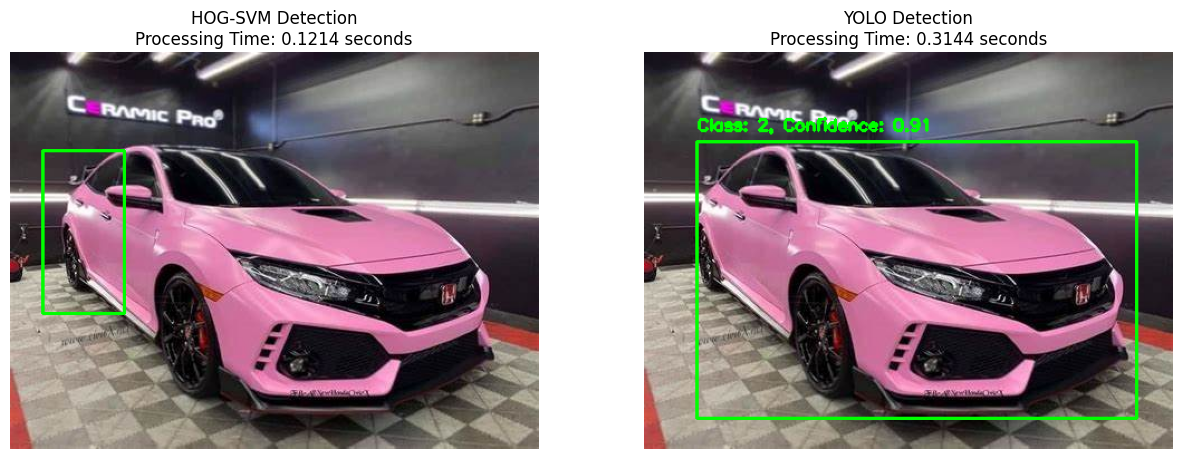

In [42]:
import cv2
from skimage.feature import hog
from sklearn.svm import LinearSVC
import numpy as np
import os
import time
import matplotlib.pyplot as plt
from ultralytics import YOLO  # Ensure you have the YOLO model available

# Load the pre-trained YOLO model
model = YOLO('yolov8n.pt')  # Use a pre-trained YOLOv8 model

# Load the image
image_path = 'car.jpeg'
image_yolo = cv2.imread(image_path)

# Check if the image was loaded successfully
if image_yolo is None:
    raise FileNotFoundError("Image not found. Please check the image path.")

# YOLO Detection
start_time_yolo = time.time()  # Start time for YOLO speed measurement
results = model(image_yolo)  # Perform inference
end_time_yolo = time.time()  # End time for YOLO speed measurement

# Process YOLO results
for result in results:
    boxes = result.boxes  # Get the boxes from the detection results
    for box in boxes:
        x1, y1, x2, y2 = box.xyxy[0].numpy()  # Get the bounding box coordinates
        conf = box.conf[0].item()  # Get the confidence score
        class_id = int(box.cls[0].item())  # Get the class ID

        if conf > 0.5:  # Filter out low confidence detections
            label = f"Class: {class_id}, Confidence: {conf:.2f}"
            # Draw bounding box and label
            cv2.rectangle(image_yolo, (int(x1), int(y1)), (int(x2), int(y2)), (0, 255, 0), 2)
            cv2.putText(image_yolo, label, (int(x1), int(y1) - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

# HOG-SVM Detection
hog = cv2.HOGDescriptor()
hog.setSVMDetector(cv2.HOGDescriptor_getDefaultPeopleDetector())

# Load the image for HOG-SVM detection
image_hog = cv2.imread(image_path)

# Check if the image was loaded successfully
if image_hog is None:
    raise FileNotFoundError("Image not found. Please check the image path.")

# Perform HOG detection
start_time_hog = time.time()  # Start time for HOG speed measurement
boxes, weights = hog.detectMultiScale(image_hog, winStride=(8, 8), padding=(8, 8), scale=1.05)
end_time_hog = time.time()  # End time for HOG speed measurement

# Draw bounding boxes on the HOG-SVM image
for (x, y, w, h) in boxes:
    cv2.rectangle(image_hog, (x, y), (x + w, y + h), (0, 255, 0), 2)

# Display Results
fig, axes = plt.subplots(1, 2, figsize=(15, 8))

axes[0].imshow(cv2.cvtColor(image_hog, cv2.COLOR_BGR2RGB))
axes[0].axis('off')
axes[0].set_title(f"HOG-SVM Detection\nProcessing Time: {end_time_hog - start_time_hog:.4f} seconds")

axes[1].imshow(cv2.cvtColor(image_yolo, cv2.COLOR_BGR2RGB))
axes[1].axis('off')
axes[1].set_title(f"YOLO Detection\nProcessing Time: {end_time_yolo - start_time_yolo:.4f} seconds")

plt.show()